## Importing the libraries 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

## Uploading the datasets

In [2]:
diamond_data = pd.read_csv("C:\\Users\\Anwar Altorkmani\\Downloads\\train.csv\\train.csv")
diamond_test_data = pd.read_csv("C:\\Users\\Anwar Altorkmani\\Downloads\\test.csv")

In [3]:
diamond_data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
diamond_test_data.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [5]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [6]:
diamond_data["price"]=diamond_data["price"].astype("float")
diamond_data.dtypes

Id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

In [7]:
#Check for missing values in the dataframe
diamond_data.isnull().any().any()

False

In [8]:
diamond_data.isna().any(axis=None)

False

In [9]:
diamond_data.duplicated().sum()

0

In [10]:
#Checks for the number of missing values in the price column
diamond_data["price"].isnull().value_counts()

False    43152
Name: price, dtype: int64

In [11]:
diamond_data.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
print(diamond_data.cut.unique())
print(diamond_data.clarity.unique())
print(diamond_data.color.unique())

['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']
['SI2' 'VVS2' 'VS2' 'IF' 'VS1' 'SI1' 'VVS1' 'I1']
['I' 'G' 'F' 'H' 'D' 'E' 'J']


In [13]:
diamond_data["cut"].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

In [14]:
diamond_data["color"].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

In [15]:
diamond_data["clarity"].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [16]:
diamond_data.shape

(43152, 11)

In [17]:
diamond_test_data.shape 

(10788, 10)

In [18]:
#Dropping dimentionless diamonds
diamond_data = diamond_data.drop(diamond_data[diamond_data["x"]==0].index)
diamond_data = diamond_data.drop(diamond_data[diamond_data["y"]==0].index)
diamond_data = diamond_data.drop(diamond_data[diamond_data["z"]==0].index)

In [19]:
#checking for the x column outliers
outliers_x_max = diamond_data[diamond_data['x'] > diamond_data['x'].mean() + 3 * diamond_data['x'].std()]
outliers_x_max 

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
1301,1302,3.04,Very Good,I,SI2,63.2,59.0,15354.0,9.14,9.07,5.75
5631,5632,3.01,Premium,I,SI2,60.2,59.0,18242.0,9.36,9.31,5.62
7389,7390,4.00,Very Good,I,I1,63.3,58.0,15984.0,10.01,9.94,6.31
8689,8690,3.01,Fair,H,I1,56.1,62.0,10761.0,9.54,9.38,5.31
9927,9928,3.00,Good,I,I1,57.0,64.0,10863.0,9.38,9.31,5.33
12566,12567,3.50,Ideal,H,I1,62.8,57.0,12587.0,9.65,9.59,6.03
16302,16303,3.65,Fair,H,I1,67.1,53.0,11668.0,9.53,9.48,6.38
18840,18841,4.01,Premium,J,I1,62.5,62.0,15223.0,10.02,9.94,6.24
18943,18944,3.00,Premium,G,I1,59.7,60.0,13203.0,9.42,9.26,5.58
20984,20985,3.11,Fair,J,I1,65.9,57.0,9823.0,9.15,9.02,5.98


In [20]:
#checking for the x column outliers
outliers_x_min = diamond_data[diamond_data['x'] < diamond_data['x'].mean() + 3 * diamond_data['x'].std()]
outliers_x_min

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270.0,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164.0,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828.0,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577.0,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596.0,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760.0,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016.0,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990.0,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734.0,4.38,4.43,2.65


In [21]:
#checking for the x column outliers
outliers_y_max = diamond_data[diamond_data['y'] > diamond_data['y'].mean() + 3 * diamond_data['y'].std()]
outliers_y_max

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
5631,5632,3.01,Premium,I,SI2,60.2,59.0,18242.0,9.36,9.31,5.62
7389,7390,4.00,Very Good,I,I1,63.3,58.0,15984.0,10.01,9.94,6.31
8689,8690,3.01,Fair,H,I1,56.1,62.0,10761.0,9.54,9.38,5.31
9927,9928,3.00,Good,I,I1,57.0,64.0,10863.0,9.38,9.31,5.33
12566,12567,3.50,Ideal,H,I1,62.8,57.0,12587.0,9.65,9.59,6.03
16302,16303,3.65,Fair,H,I1,67.1,53.0,11668.0,9.53,9.48,6.38
18840,18841,4.01,Premium,J,I1,62.5,62.0,15223.0,10.02,9.94,6.24
18943,18944,3.00,Premium,G,I1,59.7,60.0,13203.0,9.42,9.26,5.58
22540,22541,3.01,Ideal,J,SI2,61.7,58.0,16037.0,9.25,9.20,5.69
26030,26031,4.01,Premium,I,I1,61.0,61.0,15223.0,10.14,10.10,6.17


In [22]:
#checking for the x column outliers
outliers_y_min = diamond_data[diamond_data['y'] < diamond_data['y'].mean() + 3 * diamond_data['y'].std()]
outliers_y_min 

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270.0,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164.0,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828.0,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577.0,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596.0,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760.0,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016.0,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990.0,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734.0,4.38,4.43,2.65


In [23]:
#checking for the x column outliers
outliers_z_max = diamond_data[diamond_data['z'] > diamond_data['z'].mean() + 3 * diamond_data['z'].std()]
outliers_z_max

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
1301,1302,3.04,Very Good,I,SI2,63.2,59.0,15354.0,9.14,9.07,5.75
3452,3453,3.01,Fair,I,SI2,65.8,56.0,18242.0,8.99,8.94,5.90
7389,7390,4.00,Very Good,I,I1,63.3,58.0,15984.0,10.01,9.94,6.31
10541,10542,0.51,Very Good,E,VS1,61.8,54.7,1970.0,5.12,5.15,31.80
12566,12567,3.50,Ideal,H,I1,62.8,57.0,12587.0,9.65,9.59,6.03
12621,12622,2.72,Fair,J,I1,68.2,56.0,6870.0,8.46,8.43,5.76
16302,16303,3.65,Fair,H,I1,67.1,53.0,11668.0,9.53,9.48,6.38
18840,18841,4.01,Premium,J,I1,62.5,62.0,15223.0,10.02,9.94,6.24
20984,20985,3.11,Fair,J,I1,65.9,57.0,9823.0,9.15,9.02,5.98
21409,21410,2.01,Fair,G,SI2,65.6,56.0,15562.0,7.89,7.84,6.16


In [24]:
outliers_z_min = diamond_data[diamond_data['z'] < diamond_data['z'].mean() + 3 * diamond_data['z'].std()]
outliers_z_min

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270.0,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164.0,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828.0,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577.0,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596.0,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760.0,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016.0,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990.0,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734.0,4.38,4.43,2.65


In [25]:
#checking for the x column outliers
outliers_carat_max = diamond_data[diamond_data['carat'] > diamond_data['carat'].mean() + 3 * diamond_data['carat'].std()]
outliers_carat_max

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
448,449,2.30,Very Good,I,SI2,60.6,60.0,14603.0,8.51,8.56,5.17
1174,1175,2.31,Premium,I,SI2,62.9,58.0,17218.0,8.43,8.34,5.27
1301,1302,3.04,Very Good,I,SI2,63.2,59.0,15354.0,9.14,9.07,5.75
1316,1317,2.26,Ideal,H,SI2,62.2,56.0,17312.0,8.38,8.35,5.20
1397,1398,2.40,Premium,J,SI1,59.7,58.0,15920.0,8.75,8.71,5.21
...,...,...,...,...,...,...,...,...,...,...,...
42952,42953,2.28,Premium,J,VS1,60.3,58.0,16174.0,8.58,8.53,5.16
42965,42966,2.54,Very Good,I,SI2,63.5,58.0,15394.0,8.67,8.56,5.47
43001,43002,2.22,Very Good,J,SI2,61.2,63.0,10662.0,8.33,8.23,5.07
43099,43100,2.22,Very Good,I,SI2,63.2,57.0,16547.0,8.28,8.23,5.22


In [26]:
#checking for the x column outliers
outliers_carat_min = diamond_data[diamond_data['carat'] < diamond_data['carat'].mean() + 3 * diamond_data['carat'].std()]
outliers_carat_min

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270.0,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164.0,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828.0,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577.0,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596.0,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760.0,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016.0,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990.0,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734.0,4.38,4.43,2.65


In [27]:
#checking for the x column outliers
outliers_table_max = diamond_data[diamond_data['table'] > diamond_data['table'].mean() + 3 * diamond_data['table'].std()]
outliers_table_max

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
120,121,2.10,Fair,F,SI2,59.5,69.0,16506.0,8.35,8.25,4.94
255,256,1.00,Good,G,VS2,58.6,65.0,5242.0,6.61,6.53,3.85
613,614,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
616,617,0.91,Fair,H,VVS1,56.5,67.0,4115.0,6.38,6.40,3.61
869,870,1.00,Fair,H,VS1,57.4,68.0,4368.0,6.52,6.47,3.73
...,...,...,...,...,...,...,...,...,...,...,...
41732,41733,2.01,Fair,E,SI2,62.1,66.0,14948.0,7.99,7.92,4.94
42663,42664,1.56,Good,J,VS2,57.6,65.0,6966.0,7.60,7.62,4.38
42956,42957,0.89,Fair,G,SI2,58.9,66.0,2579.0,6.26,6.16,3.66
43041,43042,0.67,Fair,F,SI1,56.0,67.0,1642.0,5.81,5.78,3.25


In [28]:
outliers_table_min = diamond_data[diamond_data['table'] < diamond_data['table'].mean() + 3 * diamond_data['table'].std()]
outliers_table_min

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270.0,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164.0,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828.0,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577.0,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596.0,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760.0,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016.0,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990.0,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734.0,4.38,4.43,2.65


In [29]:
#checking for the x column outliers
outliers_depth_max = diamond_data[diamond_data['depth'] > diamond_data['depth'].mean() + 3 * diamond_data['depth'].std()]
outliers_depth_max

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
784,785,0.98,Fair,G,I1,67.3,60.0,1932.0,6.17,6.11,4.14
1105,1106,0.50,Fair,D,VVS2,67.6,57.0,1980.0,4.95,4.84,3.31
1497,1498,0.90,Fair,H,I1,66.9,63.0,1758.0,6.04,5.91,4.00
1604,1605,2.31,Fair,G,I1,67.4,56.0,7257.0,8.05,7.99,5.41
2185,2186,0.50,Fair,F,SI1,66.5,59.0,994.0,5.01,4.91,3.30
...,...,...,...,...,...,...,...,...,...,...,...
42575,42576,2.50,Fair,J,SI2,66.9,58.0,14652.0,8.36,8.22,5.55
42631,42632,1.01,Fair,G,SI1,66.9,56.0,4102.0,6.15,6.22,4.14
42949,42950,0.70,Fair,I,VS2,66.1,56.0,1814.0,5.53,5.48,3.64
42953,42954,1.00,Fair,G,SI2,70.2,58.0,2326.0,6.00,5.73,4.13


In [30]:
#checking for the x column outliers
outliers_depth_min = diamond_data[diamond_data['depth'] < diamond_data['depth'].mean() + 3 * diamond_data['depth'].std()]
outliers_depth_min

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270.0,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164.0,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828.0,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577.0,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596.0,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760.0,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016.0,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990.0,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734.0,4.38,4.43,2.65


In [31]:
median_x = diamond_data.loc[diamond_data["x"] < 9, 'x'].median()
median_y = diamond_data.loc[diamond_data["y"] < 9, 'y'].median()
median_z = diamond_data.loc[diamond_data["z"] < 5, 'z'].median()
median_carat = diamond_data.loc[diamond_data["carat"] < 9, 'carat'].median()
median_table = diamond_data.loc[diamond_data["table"] < 65, 'table'].median()
median_depth = diamond_data.loc[diamond_data["depth"] < 66, 'depth'].median()


diamond_data["x"] = np.where(diamond_data["x"] >9, median_x,diamond_data['x'])
diamond_data["y"] = np.where(diamond_data["y"] >9, median_y,diamond_data['y'])
diamond_data["z"] = np.where(diamond_data["z"] >5, median_z,diamond_data['z'])
diamond_data["carat"] = np.where(diamond_data["carat"] >9, median_carat,diamond_data['carat'])
diamond_data["table"] = np.where(diamond_data["table"] > 65, median_table,diamond_data['table'])
diamond_data["depth"] = np.where(diamond_data["depth"] >66, median_depth,diamond_data['depth'])

In [32]:
# #Dropping the outliers. 
# diamond_data = diamond_data[(diamond_data["depth"]<62)&(diamond_data["depth"]>67)]
# diamond_data = diamond_data[(diamond_data["table"]<59)&(diamond_data["table"]>65)]
# diamond_data = diamond_data[(diamond_data["x"]<7)&(diamond_data["x"]>9)]
# diamond_data = diamond_data[(diamond_data["y"]<7)&(diamond_data["y"]>9)]
# diamond_data = diamond_data[(diamond_data["z"]<4)&(diamond_data["z"]>5.6)]
# diamond_data = diamond_data[(diamond_data["carat"]<1)&(diamond_data["carat"]>3)]

## Visualizing the data 

<AxesSubplot:xlabel='cut', ylabel='price'>

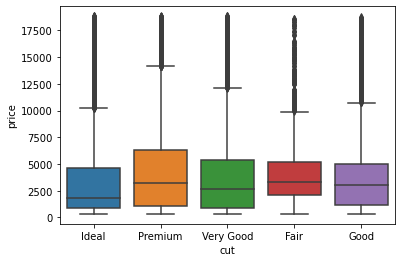

In [33]:
sns.boxplot(x="cut",y="price",data=diamond_data)

<AxesSubplot:xlabel='clarity', ylabel='price'>

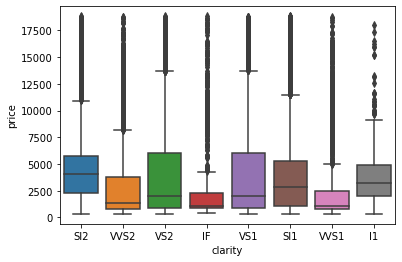

In [34]:
sns.boxplot(x="clarity",y="price",data = diamond_data)

In [36]:
colors = sns.color_palette('pastel')[0:5]

In [37]:
cut_labels = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

([<matplotlib.patches.Wedge at 0x19af67d8400>,
 [Text(-1.1398279095920014, 0.37522304901901815, 'Ideal'),
  Text(0.18893048305761156, -1.0836536681853746, 'Premium'),
  Text(1.092885035194312, 0.12490916639033292, 'Very Good'),
  Text(0.4993719033660311, 0.9801161676702347, 'Good'),
  Text(0.10367490717847808, 1.095103425992967, 'Fair')],
 [Text(-0.6648996139286674, 0.21888011192776055, '40%'),
  Text(0.1030529907586972, -0.5910838190102042, '26%'),
  Text(0.5961191101059883, 0.06813227257654522, '22%'),
  Text(0.27238467456328963, 0.5346088187292188, '9%'),
  Text(0.05654994937007894, 0.5973291414507093, '3%')])

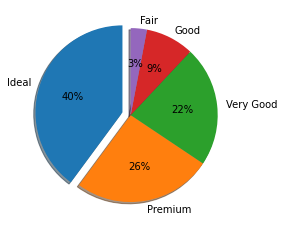

In [62]:
explode = [0.1, 0, 0, 0, 0]
plt.pie(diamond_data['cut'].value_counts(), labels=cut_labels,
        explode=explode, shadow=True, startangle=90, autopct='%.0f%%')

In [39]:
color_labels = ['G','E','F','H','D','I','J']

([<matplotlib.patches.Wedge at 0x19af5bd8640>,
 [Text(-0.7351189494460881, 0.948472524728724, 'G'),
  Text(-1.0447420215453198, -0.34425878117689146, 'E'),
  Text(-0.13862960593798257, -1.0912295048968754, 'F'),
  Text(0.8706830938542979, -0.6722432224100948, 'H'),
  Text(1.073174502699073, 0.24144665405964447, 'D'),
  Text(0.6605472343937283, 0.8795893082199198, 'I'),
  Text(0.18261363399906913, 1.0847360327184001, 'J')],
 [Text(-0.42881938717688467, 0.5532756394250891, '21%'),
  Text(-0.5698592844792653, -0.18777751700557713, '18%'),
  Text(-0.07561614869344503, -0.5952160935801138, '18%'),
  Text(0.4749180511932533, -0.36667812131459715, '15%'),
  Text(0.5853679105631306, 0.13169817494162422, '13%'),
  Text(0.3602984914874881, 0.47977598630177437, '10%'),
  Text(0.09960743672676496, 0.5916741996645819, '5%')])

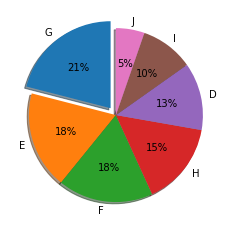

In [63]:
explode = [0.1, 0, 0, 0, 0,0,0]
plt.pie(diamond_data['color'].value_counts(), labels=color_labels,
        explode=explode, shadow=True, startangle=90, autopct='%.0f%%')

In [41]:
clarity_labels = ['SI1','VS2','SI2','VS1','VVS2','VVS1','IF','I1']

([<matplotlib.patches.Wedge at 0x19af48e4f10>,
 [Text(-0.8261337753887197, 0.8703464742055205, 'SI1'),
  Text(-0.8668502153553158, -0.677178487651847, 'VS2'),
  Text(0.3754858958250565, -1.0339295633825618, 'SI2'),
  Text(1.0757815624182134, -0.22955180234759182, 'VS1'),
  Text(0.9345448040397359, 0.580194802839815, 'VVS2'),
  Text(0.5364039949167206, 0.9603492876226768, 'VVS1'),
  Text(0.21083139693555927, 1.0796064662951037, 'IF'),
  Text(0.048293754281305445, 1.0989393583348523, 'I1')],
 [Text(-0.4819113689767531, 0.5077021099532202, '24%'),
  Text(-0.4728273901938086, -0.3693700841737347, '23%'),
  Text(0.20481048863184897, -0.5639615800268518, '17%'),
  Text(0.5867899431372072, -0.12521007400777734, '15%'),
  Text(0.5097517112944013, 0.3164698924580809, '9%'),
  Text(0.29258399722730216, 0.5238268841578236, '7%'),
  Text(0.11499894378303231, 0.5888762543427838, '3%'),
  Text(0.026342047789802966, 0.5994214681826467, '1%')])

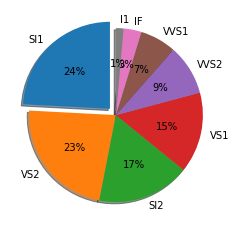

In [65]:
explode = [0.1, 0, 0, 0, 0,0,0,0]
plt.pie(diamond_data['clarity'].value_counts(), labels=clarity_labels,
        explode=explode, shadow=True, startangle=90, autopct='%.0f%%')

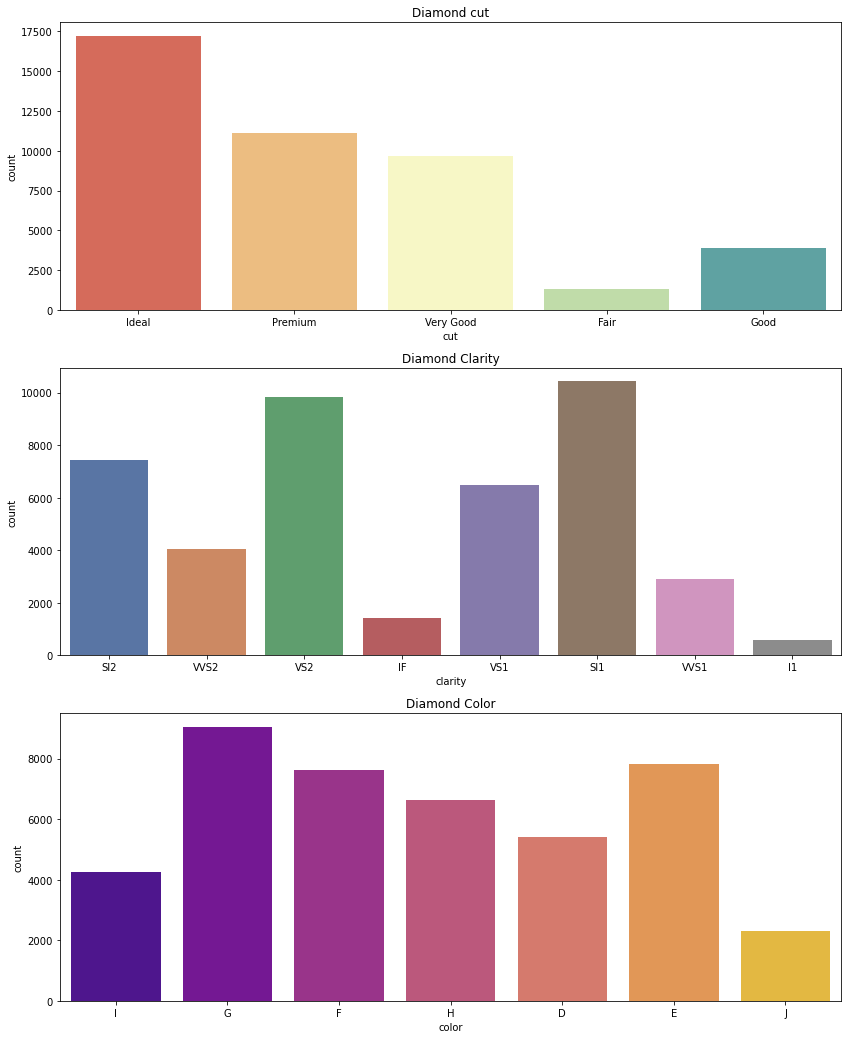

In [66]:
fig, ax = plt.subplots(3, figsize = (14,18))
sns.countplot(x = 'cut',data = diamond_data, ax=ax[0],palette="Spectral")
sns.countplot(x = 'clarity',data = diamond_data, ax=ax[1],palette="deep")
sns.countplot(x = 'color',data = diamond_data, ax=ax[2],palette="plasma")
ax[0].set_title("Diamond cut")
ax[1].set_title("Diamond Clarity")
ax[2].set_title("Diamond Color")
plt.show()

In [44]:
grouped_diamond_data_cut=diamond_data[["cut","price"]]

In [45]:
grouped_diamond_data_cut = grouped_diamond_data_cut.groupby(["cut"],as_index=False).mean()
grouped_diamond_data_cut

,cut,price
0,Fair,4358.040895
1,Good,3926.105467
2,Ideal,3434.008197
3,Premium,4585.193281
4,Very Good,3993.865072


In [46]:
grouped_df_color = diamond_data[["color","price"]]
grouped_df_color=grouped_df_color.groupby(["color"],as_index=False).mean()
grouped_df_color

,color,price
0,D,3164.045932
1,E,3092.903218
2,F,3719.865269
3,G,3974.374020
4,H,4476.818360
5,I,5126.121248
6,J,5273.038865


In [47]:
grouped_df_color = diamond_data[["clarity","price"]]
grouped_df_color=grouped_df_color.groupby(["clarity"],as_index=False).mean()
grouped_df_color

,clarity,price
0,I1,3816.033167
1,IF,2764.243412
2,SI1,4000.854019
3,SI2,5059.610048
4,VS1,3844.967099
5,VS2,3892.840648
6,VVS1,2529.096763
7,VVS2,3313.296461


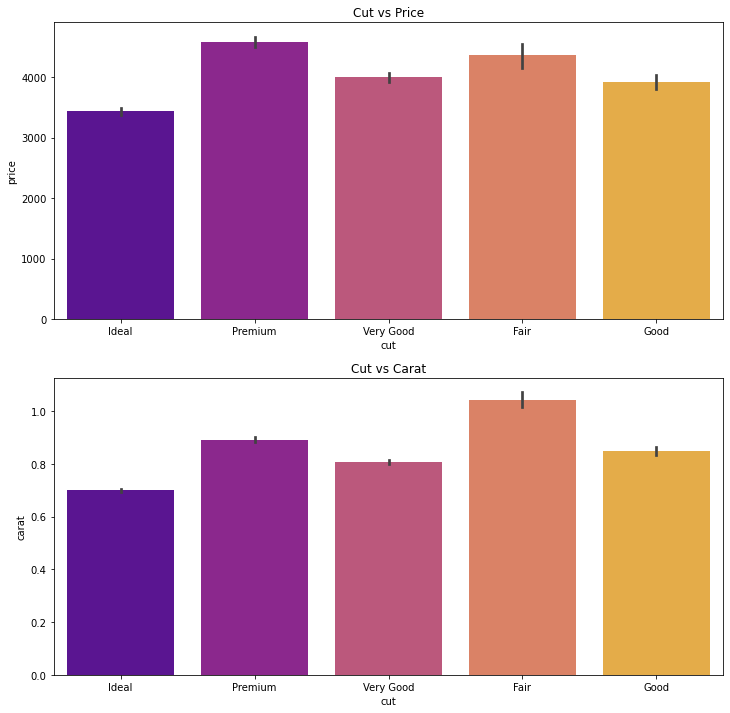

In [55]:
#f, ax = plt.subplots(3,figsize = (12,10))
f, ax = plt.subplots(2,figsize = (12,12))
sns.barplot(x="cut",y="price",data = diamond_data,ax=ax[0],palette ='plasma')
sns.barplot(x="cut",y="carat",data = diamond_data, ax=ax[1],palette ='plasma')
ax[0].set_title("Cut vs Price")
ax[1].set_title("Cut vs Carat")
plt.show()

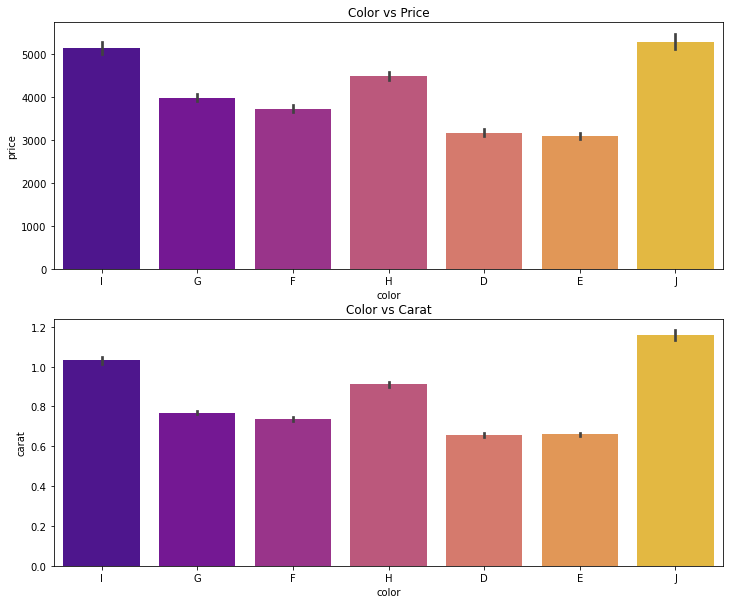

In [57]:
f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="color",y="price",data = diamond_data,ax=ax[0],palette ='plasma')
sns.barplot(x="color",y="carat",data = diamond_data, ax=ax[1],palette ='plasma')
ax[0].set_title("Color vs Price")
ax[1].set_title("Color vs Carat")
plt.show()

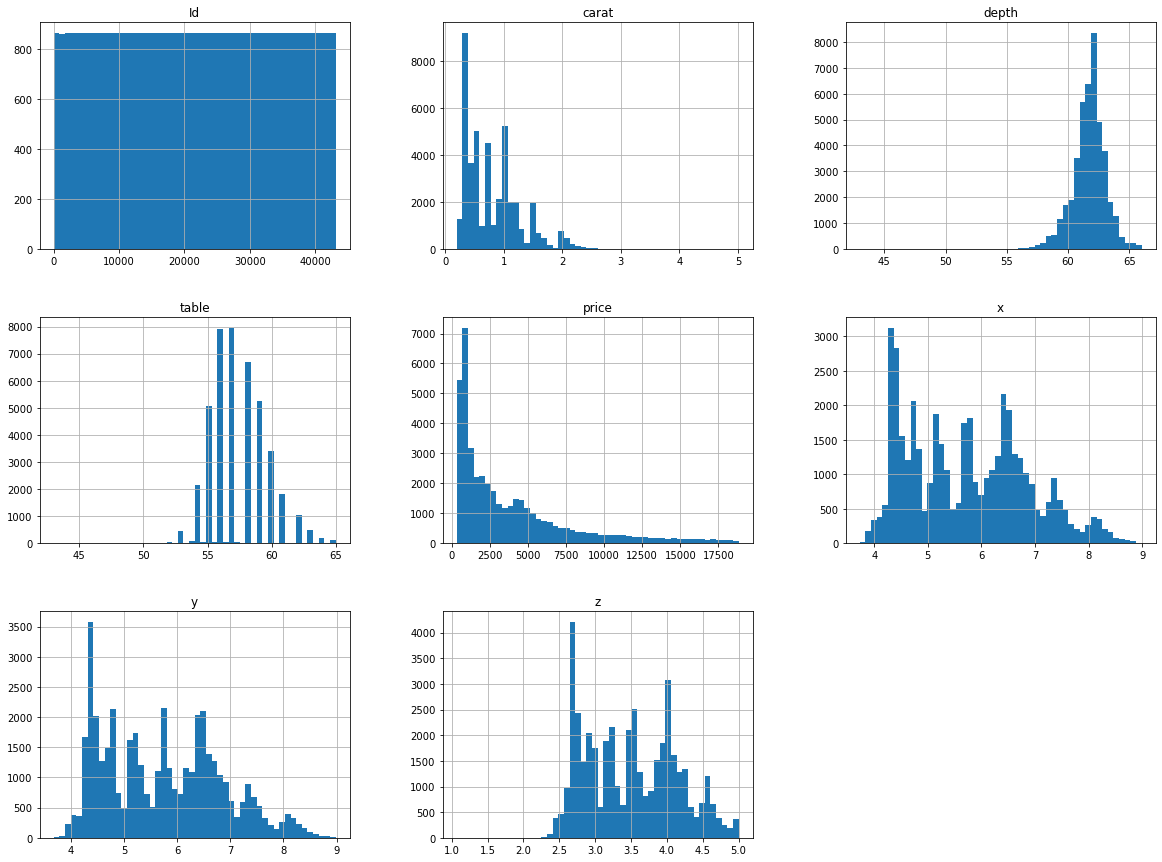

In [50]:
diamond_data.hist(bins = 50, figsize = (20,15))
plt.show()

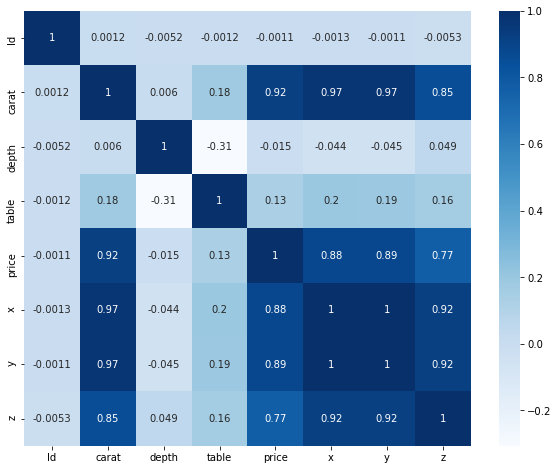

In [51]:
corr_matrix = diamond_data.corr()

plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "Blues")
plt.show()

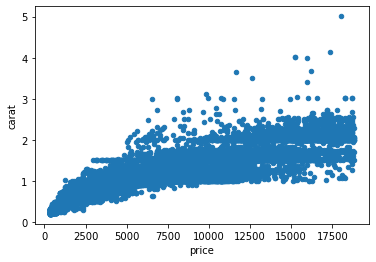

In [52]:
diamond_data.plot(kind="scatter", x="price", y="carat")
plt.show()

array([[<AxesSubplot:xlabel='depth', ylabel='depth'>,
        <AxesSubplot:xlabel='table', ylabel='depth'>,
        <AxesSubplot:xlabel='x', ylabel='depth'>,
        <AxesSubplot:xlabel='y', ylabel='depth'>,
        <AxesSubplot:xlabel='z', ylabel='depth'>],
       [<AxesSubplot:xlabel='depth', ylabel='table'>,
        <AxesSubplot:xlabel='table', ylabel='table'>,
        <AxesSubplot:xlabel='x', ylabel='table'>,
        <AxesSubplot:xlabel='y', ylabel='table'>,
        <AxesSubplot:xlabel='z', ylabel='table'>],
       [<AxesSubplot:xlabel='depth', ylabel='x'>,
        <AxesSubplot:xlabel='table', ylabel='x'>,
        <AxesSubplot:xlabel='x', ylabel='x'>,
        <AxesSubplot:xlabel='y', ylabel='x'>,
        <AxesSubplot:xlabel='z', ylabel='x'>],
       [<AxesSubplot:xlabel='depth', ylabel='y'>,
        <AxesSubplot:xlabel='table', ylabel='y'>,
        <AxesSubplot:xlabel='x', ylabel='y'>,
        <AxesSubplot:xlabel='y', ylabel='y'>,
        <AxesSubplot:xlabel='z', ylabel='y'>],
    

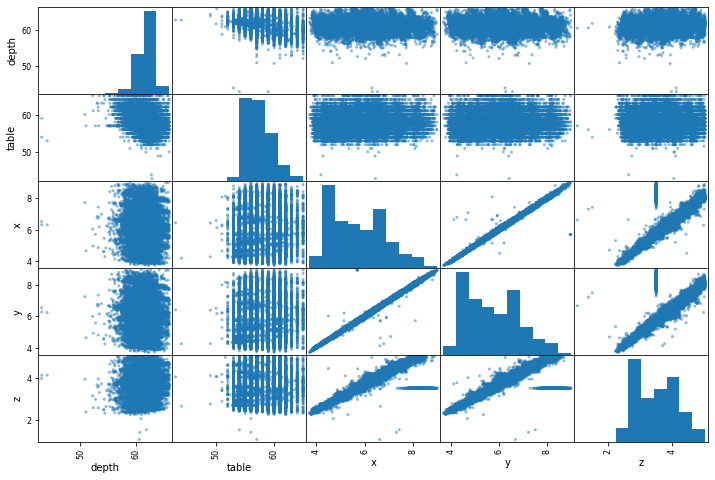

In [53]:
from pandas.plotting import scatter_matrix

attributes = ["depth","table","x","y","z"]
scatter_matrix(diamond_data[attributes], figsize=(12, 8))

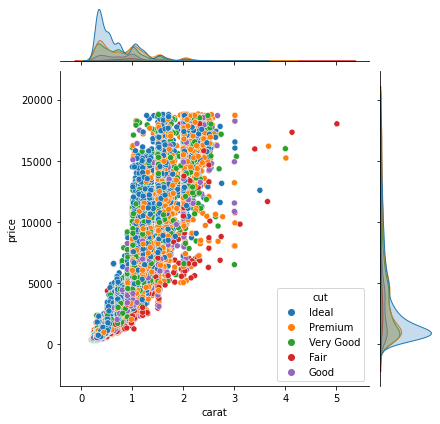

In [58]:
sns.jointplot(data=diamond_data, x="carat", y="price",hue="cut")

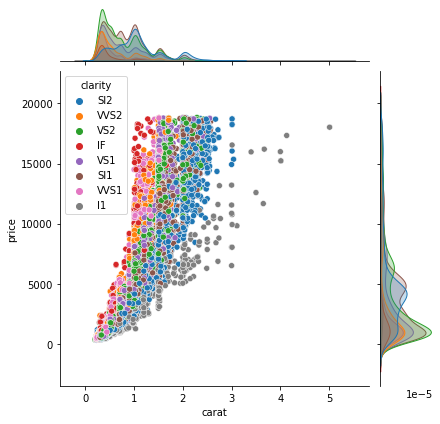

In [59]:
sns.jointplot(data=diamond_data, x="carat", y="price",hue="clarity")

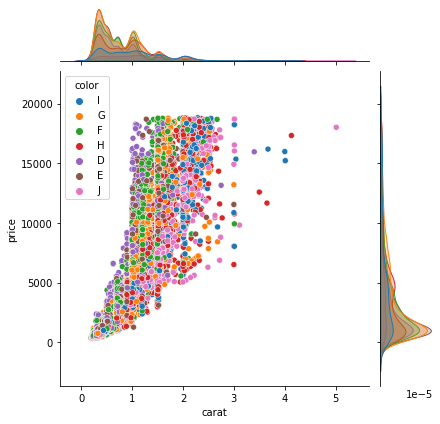

In [60]:
sns.jointplot(data=diamond_data, x="carat", y="price",hue="color")

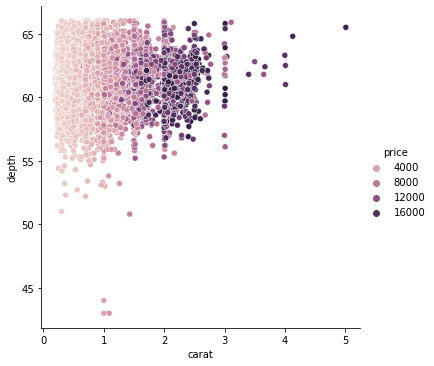

In [61]:
sns.relplot(data=diamond_data,x="carat",y="depth", hue="price")

## Preparing data for training

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer



data_label = diamond_data["price"].copy()
diamond_data = diamond_data.drop("price", axis=1)

diamonds_train_only_num =diamond_data.drop(["cut","clarity","color"],axis=1)
diamonds_train_only_cat = diamond_data[["cut","clarity","color"]]

num_train_attribs = list(diamonds_train_only_num)
cat_train_attribs = list(diamonds_train_only_cat)

num_pipeline = Pipeline([
    ('scaler', RobustScaler()),
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_train_attribs),
    ("cat", cat_pipeline, cat_train_attribs),
])

diamonds_train_prepared = preprocessor.fit_transform(diamond_data)

diamonds_test_prepared = preprocessor.transform(diamond_test_data)

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(diamonds_train_prepared , data_label, test_size=0.02, random_state=0)

pt = PowerTransformer()
pt.fit(X_train)                      
X_train_pt = pt.transform(X_train)    
X_valid_pt = pt.transform(X_valid)


pt.fit(y_train.to_frame())
 
y_train_pt = pt.transform(y_train.to_frame())
y_valid_pt = pt.transform(y_valid.to_frame())

## LinearRegression

In [100]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

#lin_reg.fit(X_train,y_train)
lin_reg.fit(X_train_pt,y_train_pt)

LinearRegression()

In [101]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lin_reg,X_train_pt,y_train_pt,scoring="neg_mean_squared_error",cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)
print("Scores :",lr_rmse_scores,"\n Mean",lr_rmse_scores.mean(),"\n Standard_deviation",lr_rmse_scores.std())

Scores : [0.128405   0.12579653 0.12599447 0.1264072  0.12575049 0.1312904
 0.12774887 0.12650074 0.12898537 0.12651332] 
 Mean 0.12733923949813514 
 Standard_deviation 0.0016909004643578488


In [102]:
y_train_pred = lin_reg.predict(X_train_pt)
print(y_train_pred)

[[ 1.89745754]
 [-1.01367528]
 [-1.23785741]
 ...
 [-0.36658055]
 [-0.73955113]
 [ 0.08587306]]


In [103]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(f"R-squared: {r2_score(y_train_pt,y_train_pred):.6f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_pt,y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_pt,y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_pt,y_train_pred):.3f}")

R-squared: 0.983814
Mean Squared Error: 0.016
Root Mean Squared Error: 0.127
Mean Absolute Error: 0.099


In [104]:
y_pred = lin_reg.predict(X_valid_pt)
print(y_pred)

[[ 1.96758683e-01]
 [ 4.76925309e-01]
 [-1.47284276e+00]
 [-4.00455062e-01]
 [-1.07379491e+00]
 [ 1.84875148e+00]
 [-1.26230199e+00]
 [ 3.28915056e-01]
 [ 1.93050798e-01]
 [-1.36220128e+00]
 [ 1.11526149e+00]
 [ 1.36578029e+00]
 [ 1.94219631e+00]
 [ 1.11233180e+00]
 [-1.32307774e+00]
 [-1.12256200e+00]
 [-3.45721785e-01]
 [ 1.77801174e+00]
 [ 8.41762956e-01]
 [ 1.68652004e+00]
 [ 1.06213039e+00]
 [-3.04874007e-01]
 [-1.88357894e-01]
 [-1.48945958e+00]
 [ 1.39135402e+00]
 [ 8.32485517e-02]
 [ 1.07276576e+00]
 [-9.71866194e-01]
 [-9.32193343e-01]
 [-3.35132186e-01]
 [-6.11362044e-01]
 [ 3.76522477e-01]
 [-3.01982466e-01]
 [ 9.22298845e-01]
 [ 1.40148586e+00]
 [-2.37002913e-01]
 [ 1.11181300e+00]
 [-1.39221532e+00]
 [-2.61951129e-02]
 [-9.96524398e-01]
 [ 1.72301906e+00]
 [ 7.14245256e-01]
 [-5.46084944e-01]
 [-1.09161717e+00]
 [ 1.00474208e+00]
 [ 1.89013332e+00]
 [-1.26443822e+00]
 [-1.25702244e+00]
 [ 3.62133439e-01]
 [-1.01698643e+00]
 [ 1.45077165e-01]
 [-8.19583480e-01]
 [-8.8586765

In [105]:
print(f"R-squared: {r2_score(y_valid_pt,y_pred):.6f}")
print(f"Mean Squared Error: {mean_squared_error(y_valid_pt, y_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_valid_pt, y_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_valid_pt, y_pred):.3f}")

R-squared: 0.982651
Mean Squared Error: 0.017
Root Mean Squared Error: 0.131
Mean Absolute Error: 0.101


In [106]:
#on the test data 
y_test_pred = lin_reg.predict(diamonds_test_prepared)
print(y_test_pred)

[[ 5.83955430e+10]
 [-1.98466801e+09]
 [ 1.98626373e+10]
 ...
 [ 7.43749217e+10]
 [ 1.16314212e+10]
 [ 1.20824323e+10]]


## Decision Tree Regression

In [107]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=42)

In [108]:
dec_tree.fit(X_train_pt,y_train_pt)

DecisionTreeRegressor(random_state=42)

In [109]:
y_train_pred_dec_tree = dec_tree.predict(X_train_pt)
print(y_train_pred_dec_tree)

[ 1.86180266 -1.2462228  -1.3401322  ... -0.28715469 -0.75007131
  0.14061175]


In [110]:
print(f"\n\nTrain Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train_pt, y_train_pred_dec_tree):.6f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_pt,y_train_pred_dec_tree):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_pt,y_train_pred_dec_tree)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_pt,y_train_pred_dec_tree):.3f}")



Train Set
--------------------------------------------------
R-squared: 1.000000
Mean Squared Error: 0.000
Root Mean Squared Error: 0.000
Mean Absolute Error: 0.000


In [111]:
y_pred_dec_tree = dec_tree.predict(X_valid_pt)
print(y_pred_dec_tree)

[ 0.21605399  0.51350691 -1.35379798 -0.27279782 -0.89634675  1.85344183
 -1.0917744   0.17893358  0.09256534 -1.47998576  1.35223044  1.18925215
  1.88148443  1.11569229 -1.42318932 -1.15185182 -0.31653895  1.78654692
  1.01818596  1.44750352  0.90124762 -0.22230833  0.05561447 -1.45119208
  1.18746027  0.13105328  0.75124188 -1.0251489  -1.04013254 -0.24693804
 -0.80103969  0.12474936 -0.27052082  0.9168903   1.63550552 -0.22176825
  1.27526085 -1.49370584  0.15368449 -0.82401242  1.3317702   0.76759709
 -0.54249711 -1.15749681  0.9397643   1.56590208 -1.49568098 -1.33000255
  0.37455436 -1.09575768  0.18904984 -0.87909309 -0.89743521 -1.12683638
 -1.0251489  -0.56159159  0.45438278 -0.87482656 -1.26337439 -1.07469514
  1.86170303 -0.92841097  0.20487055 -1.12136141  1.57145822  0.74938507
 -0.31415437  1.33025574  0.76248434 -1.26810322  1.10328831  1.59130968
  1.90017629  0.09179437  1.05048485 -1.05534561 -1.07079502  0.53790061
  0.53103256 -0.12391842 -1.24005761 -0.24416941 -1

In [112]:
print(f"R-squared: {r2_score(y_valid_pt, y_pred_dec_tree):.6f}")
print(f"Mean Squared Error: {mean_squared_error(y_valid_pt, y_pred_dec_tree):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_valid_pt,y_pred_dec_tree)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_valid_pt,y_pred_dec_tree):.3f}")

R-squared: 0.984250
Mean Squared Error: 0.016
Root Mean Squared Error: 0.125
Mean Absolute Error: 0.085


In [113]:
#on the test data 
y_test_decision_tree_pred = dec_tree.predict(diamonds_test_prepared)
print(y_test_decision_tree_pred)

[-0.49743863 -0.12732997 -0.23262915 ...  0.48668293  0.48618317
  1.7963775 ]


## Random Forest Regression

In [114]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
forest_reg.fit(X_train_pt,y_train_pt)

<ipython-input-114-6d431fce5a95>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train_pt,y_train_pt)


RandomForestRegressor(n_estimators=10, random_state=42)

In [115]:
y_train_pred_forest_reg = dec_tree.predict(X_train_pt)
print(y_train_pred_forest_reg)

[ 1.86180266 -1.2462228  -1.3401322  ... -0.28715469 -0.75007131
  0.14061175]


In [116]:
print(f"R-squared: {r2_score(y_train_pt,y_train_pred_forest_reg):.6f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_pt,y_train_pred_forest_reg):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_pt,y_train_pred_forest_reg)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_pt,y_train_pred_forest_reg):.3f}")

R-squared: 1.000000
Mean Squared Error: 0.000
Root Mean Squared Error: 0.000
Mean Absolute Error: 0.000


In [117]:
y_pred_forest_reg = dec_tree.predict(X_valid_pt)
print(y_pred_forest_reg)

[ 0.21605399  0.51350691 -1.35379798 -0.27279782 -0.89634675  1.85344183
 -1.0917744   0.17893358  0.09256534 -1.47998576  1.35223044  1.18925215
  1.88148443  1.11569229 -1.42318932 -1.15185182 -0.31653895  1.78654692
  1.01818596  1.44750352  0.90124762 -0.22230833  0.05561447 -1.45119208
  1.18746027  0.13105328  0.75124188 -1.0251489  -1.04013254 -0.24693804
 -0.80103969  0.12474936 -0.27052082  0.9168903   1.63550552 -0.22176825
  1.27526085 -1.49370584  0.15368449 -0.82401242  1.3317702   0.76759709
 -0.54249711 -1.15749681  0.9397643   1.56590208 -1.49568098 -1.33000255
  0.37455436 -1.09575768  0.18904984 -0.87909309 -0.89743521 -1.12683638
 -1.0251489  -0.56159159  0.45438278 -0.87482656 -1.26337439 -1.07469514
  1.86170303 -0.92841097  0.20487055 -1.12136141  1.57145822  0.74938507
 -0.31415437  1.33025574  0.76248434 -1.26810322  1.10328831  1.59130968
  1.90017629  0.09179437  1.05048485 -1.05534561 -1.07079502  0.53790061
  0.53103256 -0.12391842 -1.24005761 -0.24416941 -1

In [118]:
print(f"R-squared: {r2_score(y_valid_pt,y_pred_forest_reg):.6f}")
print(f"Mean Squared Error: {mean_squared_error(y_valid_pt,y_pred_forest_reg):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_valid_pt,y_pred_forest_reg)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_valid_pt,y_pred_forest_reg):.3f}")

R-squared: 0.984250
Mean Squared Error: 0.016
Root Mean Squared Error: 0.125
Mean Absolute Error: 0.085


In [119]:
#on the test data 
y_test_forest_reg_pred = forest_reg.predict(diamonds_test_prepared)
print(y_test_forest_reg_pred)

[-0.30416728 -0.007292   -0.22974409 ...  0.46500226  0.41113779
  1.41458983]


## Ridge

In [120]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train_pt,y_train_pt)

Ridge()

In [121]:
y_train_pred_ridge_reg = ridge_reg.predict(X_train_pt)
print(y_train_pred_ridge_reg)

[[ 1.89658443]
 [-1.0131544 ]
 [-1.2369403 ]
 ...
 [-0.36656908]
 [-0.73972475]
 [ 0.08548145]]


In [122]:
print(f"R-squared: {r2_score(y_train_pt,y_train_pred_ridge_reg):.6f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_pt,y_train_pred_ridge_reg):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_pt,y_train_pred_ridge_reg)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_pt,y_train_pred_ridge_reg):.3f}")

R-squared: 0.983814
Mean Squared Error: 0.016
Root Mean Squared Error: 0.127
Mean Absolute Error: 0.099


In [123]:
y_pred_ridge_reg = ridge_reg.predict(X_valid_pt)
print(y_pred_ridge_reg)

[[ 0.19674373]
 [ 0.47695315]
 [-1.47262018]
 [-0.40060408]
 [-1.07346686]
 [ 1.84883361]
 [-1.26278387]
 [ 0.32855046]
 [ 0.19379023]
 [-1.36215   ]
 [ 1.1146891 ]
 [ 1.36577579]
 [ 1.94056807]
 [ 1.11218892]
 [-1.32197606]
 [-1.12286818]
 [-0.34583514]
 [ 1.77783888]
 [ 0.84127798]
 [ 1.68698992]
 [ 1.06292905]
 [-0.30547846]
 [-0.18803641]
 [-1.48918695]
 [ 1.39165202]
 [ 0.0842363 ]
 [ 1.0726537 ]
 [-0.97247813]
 [-0.93204741]
 [-0.33570654]
 [-0.61155536]
 [ 0.37686378]
 [-0.30107578]
 [ 0.92282327]
 [ 1.40114639]
 [-0.23673258]
 [ 1.11194647]
 [-1.39216204]
 [-0.02593927]
 [-0.99656349]
 [ 1.72215523]
 [ 0.71456874]
 [-0.54633728]
 [-1.09211964]
 [ 1.00470537]
 [ 1.89031102]
 [-1.26426414]
 [-1.25697573]
 [ 0.36230122]
 [-1.01713139]
 [ 0.1447508 ]
 [-0.81869797]
 [-0.88509024]
 [-1.36638396]
 [-1.21151947]
 [-0.51330465]
 [ 0.5607166 ]
 [-0.79240247]
 [-1.236944  ]
 [-1.07797116]
 [ 1.91719657]
 [-1.04388164]
 [ 0.31812747]
 [-1.22329663]
 [ 1.66132772]
 [ 0.57184801]
 [-0.14878

In [124]:
print(f"R-squared: {r2_score(y_valid_pt,y_pred_ridge_reg):.6f}")
print(f"Mean Squared Error: {mean_squared_error(y_valid_pt,y_pred_ridge_reg):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_valid_pt,y_pred_ridge_reg)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_valid_pt,y_pred_ridge_reg):.3f}")

R-squared: 0.982679
Mean Squared Error: 0.017
Root Mean Squared Error: 0.131
Mean Absolute Error: 0.101


In [125]:
#on the test data 
y_test_pred_ridge_reg= ridge_reg.predict(diamonds_test_prepared)
print(y_test_pred_ridge_reg)

[[-0.54952341]
 [ 0.09030037]
 [-0.4890006 ]
 ...
 [ 0.14755469]
 [ 0.60952056]
 [ 1.93484783]]


## AdaBoostRegressor

In [132]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators = 100)
ada_reg.fit(X_train_pt,y_train_pt)

C:\Users\Anwar Altorkmani\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(n_estimators=100)

In [133]:
y_train_pred_ada_reg = ada_reg.predict(X_train_pt)
print(y_train_pred_ada_reg )

[ 1.37519735 -0.93099248 -1.30088303 ... -0.32196858 -0.42643118
  0.1356499 ]


In [134]:
print(f"R-squared: {r2_score(y_train_pt,y_train_pred_ada_reg ):.6f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_pt,y_train_pred_ada_reg):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_pt,y_train_pred_ada_reg )):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_pt,y_train_pred_ada_reg ):.3f}")

R-squared: 0.943521
Mean Squared Error: 0.056
Root Mean Squared Error: 0.238
Mean Absolute Error: 0.191


In [135]:
y_pred_ada_reg = ada_reg.predict(X_valid_pt)
print(y_pred_ada_reg)

[ 0.30583061  0.79292242 -1.28390133 -0.30126484 -1.13854422  1.40195673
 -1.25556944  0.31953441  0.09051845 -1.36310318  0.89830263  1.37519735
  1.39677234  0.96182204 -1.15262716 -1.07826973 -0.32410466  1.291123
  0.80979082  1.34017516  1.05561607 -0.27719749 -0.17790574 -1.28390133
  1.26939182  0.1356499   1.1575634  -1.27202803 -1.04550311 -0.33768571
 -0.93099248  0.12623079 -0.32196858  1.17885099  1.34686365 -0.17433433
  0.91173879 -1.29189872  0.37120716 -0.9121466   1.34686365  0.92076161
 -0.34806377 -1.28390133  0.94967624  1.34017516 -1.16984903 -1.30121162
  0.1356499  -1.28396988  0.12623079 -0.93058797 -0.41520997 -1.37765278
 -1.25556944 -0.30033051  0.21148359 -0.92895998 -1.04550311 -1.28390133
  1.33927748 -1.16984903  0.46003575 -1.28390133  1.20952111  0.87092992
 -0.24831219  1.1575634   0.65687907 -1.36310318  0.87092992  1.24814611
  1.42113637 -0.17790574  0.85537278 -0.778607   -1.16984903  0.81221923
  0.80979082  0.12623079 -1.27202803 -0.24880173 -1.0

In [136]:
print(f"R-squared: {r2_score(y_valid_pt,y_pred_ada_reg):.6f}")
print(f"Mean Squared Error: {mean_squared_error(y_valid_pt,y_pred_ada_reg):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_valid_pt,y_pred_ada_reg)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_valid_pt,y_pred_ada_reg):.3f}")

R-squared: 0.946030
Mean Squared Error: 0.054
Root Mean Squared Error: 0.232
Mean Absolute Error: 0.186


In [137]:
y_test_pred_ada_reg = ada_reg.predict(diamonds_test_prepared)
print(y_test_pred_ada_reg)

[-0.609835   -0.02525833 -0.33768571 ...  0.02688224  0.54641491
  1.26939182]


## GradientBoostingRegressor

In [138]:
from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1,
                                     max_depth = 1, random_state = 42)

In [139]:
grad_reg.fit(X_train_pt,y_train_pt)

C:\Users\Anwar Altorkmani\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=1, random_state=42)

In [140]:
y_train_pred_grad_reg = grad_reg.predict(X_train_pt)
print(y_train_pred_grad_reg)

[ 1.50030682 -0.94140557 -1.20782918 ... -0.34367824 -0.38528296
  0.10278124]


In [141]:
print(f"R-squared: {r2_score(y_train_pt,y_train_pred_grad_reg):.6f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_pt,y_train_pred_grad_reg):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_pt,y_train_pred_grad_reg)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_pt,y_train_pred_grad_reg):.3f}")

R-squared: 0.956308
Mean Squared Error: 0.044
Root Mean Squared Error: 0.209
Mean Absolute Error: 0.164


In [142]:
y_pred_grad_reg = grad_reg.predict(X_valid_pt)
print(y_pred_grad_reg)

[ 0.08583047  0.6931558  -1.20782918 -0.36116422 -1.107736    1.6176732
 -1.19180298  0.29898564  0.13513252 -1.29291161  0.86932345  1.39985219
  1.65927791  0.95905797 -1.20893191 -1.20782918 -0.34367824  1.45705377
  0.75039759  1.53792421  0.88285633 -0.34367824 -0.31808583 -1.25853936
  1.37895312  0.08583047  1.08964228 -1.13920864 -1.00470133 -0.34367824
 -0.81003199  0.20718418 -0.34367824  1.18917601  1.3586669  -0.19990867
  0.84395916 -1.30919255  0.49188889 -1.17837953  1.44335     0.91992704
 -0.38675663 -1.26304567  0.96153175  1.53792421 -1.13718566 -1.33858353
  0.03425999 -1.29291161  0.14541768 -0.86262633 -0.46503194 -1.29249533
 -1.13718566 -0.34393274  0.32790413 -1.00853465 -1.20782918 -1.29291161
  1.50030682 -1.13640387  0.42978843 -1.12619603  1.1354798   0.77143112
 -0.21158941  1.13725532  0.56863059 -1.20782918  0.85345359  1.36790595
  1.57459481 -0.19312938  0.87861874 -0.84005817 -1.08365622  0.73921868
  0.73921868  0.09876855 -1.16585352 -0.31808583 -0.

In [143]:
print(f"R-squared: {r2_score(y_valid_pt,y_pred_grad_reg):.6f}")
print(f"Mean Squared Error: {mean_squared_error(y_valid_pt,y_pred_grad_reg):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_valid_pt,y_pred_grad_reg)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_valid_pt,y_pred_grad_reg):.3f}")

R-squared: 0.958225
Mean Squared Error: 0.041
Root Mean Squared Error: 0.204
Mean Absolute Error: 0.160


In [144]:
y_test_pred_grad_reg  = ada_reg.predict(diamonds_test_prepared)
print(y_test_pred_grad_reg)

[-0.609835   -0.02525833 -0.33768571 ...  0.02688224  0.54641491
  1.26939182]


## XGBRegressor

In [145]:
from xgboost.sklearn import XGBRegressor

In [146]:
xgb =  XGBRegressor()
xgb.fit(X_train_pt,y_train_pt)

[14:33:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [147]:
y_train_pred = xgb.predict(X_train_pt) 
y_valid_pred = xgb.predict(X_valid_pt)

In [148]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(f"R-squared: {r2_score(y_train_pt,y_train_pred):.6f}")
print(f"R-squared: {r2_score(y_valid_pt,y_valid_pred):.6f}")

R-squared: 0.985960
R-squared: 0.985528


## GridSearch with RandomForest Model

In [157]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

In [158]:
# Create the parameter dictionary for the param_grid in the grid search
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
grid.fit(X_train_pt, y_train_pt)

C:\Users\Anwar Altorkmani\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Anwar Altorkmani\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [159]:
grid.best_score_ 

0.9912271030614805

In [160]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 30}

In [161]:
y_train_predict = grid.predict(X_train_pt)

In [162]:
print(f"R-squared: {r2_score(y_train_pt,y_train_predict):.6f}")

R-squared: 0.998356


In [163]:
y_predict = grid.predict(X_valid_pt)

In [164]:
print("R2 score:",(y_valid_pt,y_predict))

R2 score: (array([[ 2.53990274e-01],
       [ 5.70788389e-01],
       [-1.35379798e+00],
       [-3.51187254e-01],
       [-8.96346748e-01],
       [ 1.69877531e+00],
       [-1.09177440e+00],
       [ 3.13401283e-01],
       [ 1.37681255e-01],
       [-1.47998576e+00],
       [ 1.35223044e+00],
       [ 1.19059359e+00],
       [ 1.78725695e+00],
       [ 1.09907203e+00],
       [-1.42318932e+00],
       [-1.27922421e+00],
       [-3.46863444e-01],
       [ 1.75575600e+00],
       [ 6.46806137e-01],
       [ 1.78545335e+00],
       [ 1.04732208e+00],
       [-1.70290088e-01],
       [-2.04117206e-01],
       [-1.72511369e+00],
       [ 1.13605418e+00],
       [ 6.61278318e-03],
       [ 1.00164122e+00],
       [-1.02514890e+00],
       [-1.06691012e+00],
       [-2.46938038e-01],
       [-6.96300461e-01],
       [ 2.70956587e-01],
       [-3.43787015e-01],
       [ 7.98543447e-01],
       [ 1.40802607e+00],
       [-2.43616663e-01],
       [ 1.27526085e+00],
       [-1.49370584e+00],
 

In [165]:
print(f"R-squared: {r2_score(y_valid_pt,y_predict):.6f}")

R-squared: 0.991798


In [145]:
submission = diamond_test_data[["Id"]]
submission

,Id
0,1
1,2
2,3
3,4
4,5
...,...
10783,10784
10784,10785
10785,10786
10786,10787


In [146]:
submission["Price"] = y_test_decision_tree_pred

<ipython-input-146-b0c66b8a2eeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["Price"] = y_test_decision_tree_pred


In [147]:
submission

,Id,Price
0,1,676.0
1,2,3199.0
2,3,813.0
3,4,2901.0
4,5,1123.0
...,...,...
10783,10784,1949.0
10784,10785,6529.0
10785,10786,4246.0
10786,10787,4201.0


In [148]:
submission.to_csv("submission.csv")